In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Build Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | jambi
Processing Record 5 of Set 1 | rio pardo
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | aras
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | mundwa
Processing Record 15 of Set 1 | auki
Processing Record 16 of Set 1 | barroualie
City not found. Skipping...
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | san pedro
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | port hueneme
Processing

Processing Record 35 of Set 4 | chokurdakh
Processing Record 36 of Set 4 | margate
Processing Record 37 of Set 4 | atasu
Processing Record 38 of Set 4 | zaragoza
Processing Record 39 of Set 4 | kurmanayevka
Processing Record 40 of Set 4 | ugento
Processing Record 41 of Set 4 | killybegs
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | berbera
Processing Record 44 of Set 4 | severnoye
Processing Record 45 of Set 4 | safaga
Processing Record 46 of Set 4 | morgan city
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | lamu
Processing Record 50 of Set 4 | umm lajj
Processing Record 1 of Set 5 | hauzenberg
Processing Record 2 of Set 5 | chara
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | mana
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | opuwo
Processing Record 8 of Set 5 | buala
Processing

Processing Record 26 of Set 8 | ilam
Processing Record 27 of Set 8 | khonuu
City not found. Skipping...
Processing Record 28 of Set 8 | guanica
Processing Record 29 of Set 8 | tucurui
Processing Record 30 of Set 8 | alghero
Processing Record 31 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 32 of Set 8 | ozernovskiy
Processing Record 33 of Set 8 | emba
Processing Record 34 of Set 8 | chake chake
Processing Record 35 of Set 8 | talnakh
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | yar-sale
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | acurenam
Processing Record 40 of Set 8 | qui nhon
Processing Record 41 of Set 8 | strezhevoy
Processing Record 42 of Set 8 | provins
Processing Record 43 of Set 8 | presidente epitacio
Processing Record 44 of Set 8 | neon soulion
Processing Record 45 of Set 8 | champasak
Processing Record 46 of Set 8 | ruwi
Processing Record 47 of Set 8 | potiskum
Processing Record 48 of Set 8 | lata
Proc

Processing Record 15 of Set 12 | kasra
City not found. Skipping...
Processing Record 16 of Set 12 | chunoyar
Processing Record 17 of Set 12 | basqal
Processing Record 18 of Set 12 | kudahuvadhoo
Processing Record 19 of Set 12 | rundu
Processing Record 20 of Set 12 | bougouni
Processing Record 21 of Set 12 | srednekolymsk
Processing Record 22 of Set 12 | skjervoy
Processing Record 23 of Set 12 | bima
Processing Record 24 of Set 12 | broome
Processing Record 25 of Set 12 | santa maria
Processing Record 26 of Set 12 | yulara
Processing Record 27 of Set 12 | barcelos
Processing Record 28 of Set 12 | bourail
Processing Record 29 of Set 12 | luena
Processing Record 30 of Set 12 | nguru
Processing Record 31 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 32 of Set 12 | aripuana
Processing Record 33 of Set 12 | turbat
Processing Record 34 of Set 12 | navalcarnero
Processing Record 35 of Set 12 | redhakhol
City not found. Skipping...
Processing Record 36 of Set 12 | umm ka

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,50.90,79,99,18.28,ZA,2021-07-29 06:29:57
1,Carnarvon,-24.8667,113.6333,68.07,60,90,12.66,AU,2021-07-29 06:29:58
2,Busselton,-33.6500,115.3333,63.09,77,16,32.19,AU,2021-07-29 06:29:58
3,Jambi,-1.6000,103.6167,93.65,36,26,5.59,ID,2021-07-29 06:29:58
4,Rio Pardo,-29.9897,-52.3781,36.41,87,6,8.81,BR,2021-07-29 06:29:59
5,Cherskiy,68.7500,161.3000,36.73,80,100,23.24,RU,2021-07-29 06:29:59
6,Kaitangata,-46.2817,169.8464,46.81,93,63,8.59,NZ,2021-07-29 06:30:00
7,Aras,42.5617,-2.3560,61.05,71,0,5.75,ES,2021-07-29 06:30:00
8,Bengkulu,-3.8004,102.2655,85.68,65,18,13.13,ID,2021-07-29 06:30:01
9,Avarua,-21.2078,-159.7750,68.05,88,90,9.22,CK,2021-07-29 06:26:05


In [12]:
new_column_order = ['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-07-29 06:29:57,-34.4187,19.2345,50.90,79,99,18.28
1,Carnarvon,AU,2021-07-29 06:29:58,-24.8667,113.6333,68.07,60,90,12.66
2,Busselton,AU,2021-07-29 06:29:58,-33.6500,115.3333,63.09,77,16,32.19
3,Jambi,ID,2021-07-29 06:29:58,-1.6000,103.6167,93.65,36,26,5.59
4,Rio Pardo,BR,2021-07-29 06:29:59,-29.9897,-52.3781,36.41,87,6,8.81
...,...,...,...,...,...,...,...,...,...
565,Chicama,PE,2021-07-29 06:34:13,-7.8447,-79.1469,64.04,89,67,4.92
566,Chongwe,ZM,2021-07-29 06:34:13,-15.3292,28.6820,62.01,52,57,6.53
567,Cardenas,CU,2021-07-29 06:34:14,23.0375,-81.2047,77.76,83,16,7.25
568,Sibu,MY,2021-07-29 06:34:14,2.3000,111.8167,93.51,52,40,4.61


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

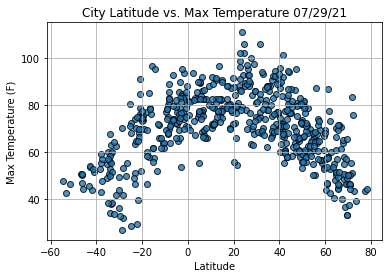

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

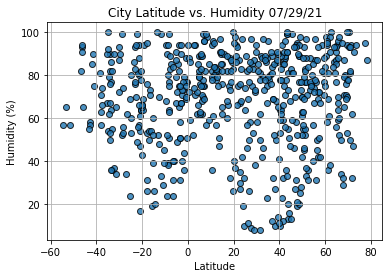

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

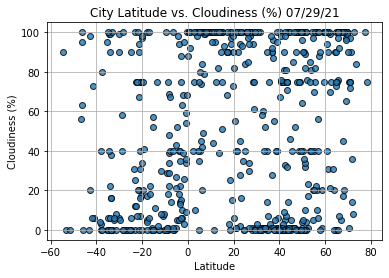

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

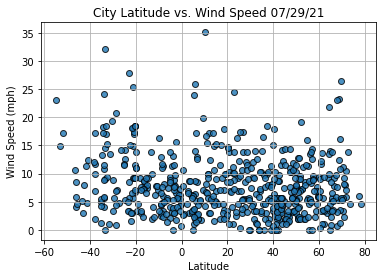

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()